In [1]:
import os
import pandas as pd
import numpy as np
from itertools import product
from pulp import LpVariable, lpSum, value
from ortoolpy import model_min, addvars, addvals

INPUT_DIR = "サンプルコード_20201021/6章/"

In [2]:
os.listdir(INPUT_DIR)

['network_weight.csv',
 'rel_cost.csv',
 'trans_route_new.csv',
 'demand.csv',
 'tbl_factory.csv',
 'tbl_transaction.csv',
 '6П═_ХиЧмВ╠Н┼УKГЛБ[ГgВЁГRГУГTГЛГeГBГУГOВ╖ВщВPВOЦ{ГmГbГN.ipynb',
 'trans_route.csv',
 'tbl_warehouse.csv',
 'supply.csv',
 'network_pos.csv',
 'trans_route_pos.csv',
 'trans_cost.csv',
 '6П═_ХиЧмВ╠Н┼УKГЛБ[ГgВЁГRГУГTГЛГeГBГУГOВ╖ВщВPВOЦ{ГmГbГN_answer.ipynb']

In [3]:
df_tc = pd.read_csv(INPUT_DIR + 'trans_cost.csv', index_col='工場')
df_tr = pd.read_csv(INPUT_DIR + 'trans_route.csv', index_col='工場')
df_demand = pd.read_csv(INPUT_DIR + 'demand.csv')
df_supply = pd.read_csv(INPUT_DIR + 'supply.csv')

print(df_tc.head())
print(df_tr.head())
print(df_demand.head())
print(df_supply.head())

    F1  F2  F3  F4
工場                
W1  10  10  11  27
W2  18  21  12  14
W3  15  12  14  12
    F1  F2  F3  F4
工場                
W1  15  15   0   5
W2   5   0  30   5
W3  10  15   2  15
   F1  F2  F3  F4
0  28  29  31  25
   W1  W2  W3
0  35  41  42


In [4]:
np.random.seed(1)
nw = len(df_tc.index)
nf = len(df_tc.columns)
pr = list(product(range(nw), range(nf)))

m1 = model_min()
v1 = {(i, j):LpVariable('v%d_%d' % (i, j), lowBound=0) for i, j in pr}

m1 += lpSum(df_tc.iloc[i][j]*v1[i, j] for i, j in pr)
for i in range(nw):
    m1 += lpSum(v1[i,j] for j in range(nf)) <= df_supply.iloc[0][i]
    
for j in range(nf):
    m1 += lpSum(v1[i,j] for i in range(nw)) >= df_demand.iloc[0][j]
    
m1.solve()

df_tr_sol = df_tr.copy()
total_cost = 0
for k, x in v1.items():
    i, j = k[0], k[1]
    df_tr_sol.iloc[i][j] = value(x)
    total_cost += df_tc.iloc[i][j]*df_tr_sol.iloc[i][j]
    
print(df_tr_sol)
print(total_cost)

total_cost = 0
for k, x in v1.items():
    i, j = k[0], k[1]
    total_cost += df_tc.iloc[i][j]*df_tr.iloc[i][j]
    
print(df_tr)
print(total_cost)

    F1  F2  F3  F4
工場                
W1  28   7   0   0
W2   0   0  31   5
W3   0  22   0  20
1296
    F1  F2  F3  F4
工場                
W1  15  15   0   5
W2   5   0  30   5
W3  10  15   2  15
1493


## knock 62

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

In [6]:
positions = pd.read_csv(INPUT_DIR + 'trans_route_pos.csv')
routes = pd.read_csv(INPUT_DIR + 'trans_route.csv', index_col='工場')
routes_sol = df_tr_sol

print(positions.head())
print(routes.head())
print(routes_sol.head())

   W1  W2  W3   F1   F2   F3   F4
0   0   0   0  4.0  4.0  4.0  4.0
1   1   2   3  0.5  1.5  2.5  3.5
    F1  F2  F3  F4
工場                
W1  15  15   0   5
W2   5   0  30   5
W3  10  15   2  15
    F1  F2  F3  F4
工場                
W1  28   7   0   0
W2   0   0  31   5
W3   0  22   0  20


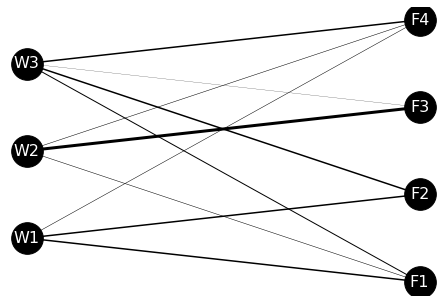

In [7]:
G = nx.Graph()

for node in positions.columns:
    G.add_node(node)
    
num_pre = 0
edge_weights = []
size = 0.1
for n0 in positions.columns:
    for n1 in positions.columns:
        if n0 != n1:
            G.add_edge(n0, n1)
            if num_pre < len(G.edges):
                num_pre = len(G.edges)
                weight = 0
                if (n0 in routes.columns) and (n1 in routes.index):
                    if routes[n0][n1]:
                        weight = routes[n0][n1] * size
                elif (n0 in routes.index) and (n1 in routes.columns):
                    if routes[n1][n0]:
                        weight = routes[n1][n0] * size
                edge_weights.append(weight)

pos = {}
for node in positions.columns:
    pos[node] = (positions[node][0], positions[node][1])
    
nx.draw(G, pos, with_labels=True, font_size=16, node_size=1000, node_color='k', font_color='w', width=edge_weights)

plt.show()

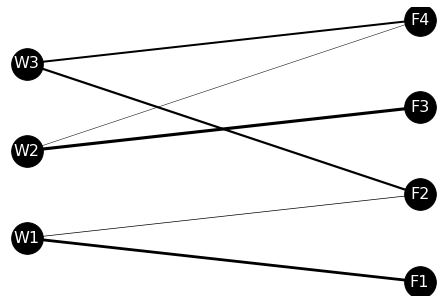

In [8]:
G = nx.Graph()

for node in positions.columns:
    G.add_node(node)
    
num_pre = 0
edge_weights = []
size = 0.1
for n0 in positions.columns:
    for n1 in positions.columns:
        if n0 != n1:
            G.add_edge(n0, n1)
            if num_pre < len(G.edges):
                num_pre = len(G.edges)
                weight = 0
                if (n0 in routes_sol.columns) and (n1 in routes_sol.index):
                    if routes_sol[n0][n1]:
                        weight = routes_sol[n0][n1] * size
                elif (n0 in routes_sol.index) and (n1 in routes_sol.columns):
                    if routes_sol[n1][n0]:
                        weight = routes_sol[n1][n0] * size
                edge_weights.append(weight)

pos = {}
for node in positions.columns:
    pos[node] = (positions[node][0], positions[node][1])
    
nx.draw(G, pos, with_labels=True, font_size=16, node_size=1000, node_color='k', font_color='w', width=edge_weights)

plt.show()

## knock 63

In [9]:
def condition_demand(df_tr, df_demand):
    flg = np.zeros(len(df_demand.columns))
    for i, col in enumerate(df_demand.columns):
        temp_sum = sum(df_tr[col])
        if (temp_sum >= df_demand.iloc[0][col]):
            flg[i] = 1
            
    return flg

def condition_supply(df_tr, df_supply):
    flg = np.zeros(len(df_supply.columns))
    for i, col in enumerate(df_supply.columns):
        temp_sum = sum(df_tr.loc[col])
        if (temp_sum <= df_supply.iloc[0][col]):
            flg[i] = 1
            
    return flg

In [10]:
print(condition_demand(routes, df_demand))
print(condition_supply(routes, df_supply))

[1. 1. 1. 1.]
[1. 1. 1.]


In [11]:
print(condition_demand(routes_sol, df_demand))
print(condition_supply(routes_sol, df_supply))

[1. 1. 1. 1.]
[1. 1. 1.]


## knock 64

In [12]:
INPUT_DIR = "サンプルコード_20201021/7章/"

df_material = pd.read_csv(INPUT_DIR + 'product_plan_material.csv', index_col='製品')
df_profit = pd.read_csv(INPUT_DIR + 'product_plan_profit.csv', index_col='製品')
df_stock = pd.read_csv(INPUT_DIR + 'product_plan_stock.csv', index_col='項目')
df_plan = pd.read_csv(INPUT_DIR + 'product_plan.csv', index_col='製品')

print(df_material.head())
print(df_profit.head())
print(df_stock.head())
print(df_plan.head())

     原料1  原料2  原料3
製品                
製品1    1    4    3
製品2    2    4    1
      利益
製品      
製品1  5.0
製品2  4.0
    原料1  原料2  原料3
項目               
在庫   40   80   50
      生産量
製品       
製品1    16
製品2     0


## knock 65

In [13]:
def product_profit(df_profit, df_plan):
    profit = 0
    for i in df_profit.index:
        for j, col in enumerate(df_plan.columns):
            profit += df_profit.loc[i][j] * df_plan.loc[i][j]
    return profit

In [14]:
product_profit(df_profit, df_plan)

80.0

## knock 66

In [15]:
from ortoolpy import model_max

In [16]:
df = df_material.copy()
inv = df_stock

m = model_max()
v1 = {(i):LpVariable('v%d' % (i), lowBound=0) for i in range(len(df_profit))}
m += lpSum(df_profit.iloc[i] * v1[i] for i in range(len(df_profit)))
for i, col in enumerate(df_material.columns):
    m += lpSum(df_material.iloc[j][i] * v1[j] for j in range(len(df_profit))) <= df_stock.iloc[:, i]

m.solve()

df_plan_sol = df_plan.copy()
for k, x in v1.items():
    df_plan_sol.iloc[k] = value(x)
    
print(df_plan_sol)
print(value(m.objective))

      生産量
製品       
製品1    15
製品2     5
95.0


## knock 67

In [17]:
def condition_stock(df_plan, df_material, df_stock):
    flg = np.zeros(len(df_material.columns))
    for i in range(len(df_material.columns)):
        temp_sum = 0
        for j in range(len(df_material.index)):
            temp_sum += df_material.iloc[j][i] * float(df_plan.iloc[j])
            
        if temp_sum <= float(df_stock.iloc[0][i]):
            flg[i] = 1
            
        print(f"material:{df_material.columns[i]}, usage:{temp_sum}, stock:{df_stock.iloc[0][i]}")
    return flg

In [18]:
condition_stock(df_plan_sol, df_material, df_stock)

material:原料1, usage:25.0, stock:40
material:原料2, usage:80.0, stock:80
material:原料3, usage:50.0, stock:50


array([1., 1., 1.])

## knock 68

In [19]:
products = list('AB')
demand_locs = list('PQ')
factories = list('XY')
lanes = (2, 2)

# transportation cost
tbdi = pd.DataFrame(((j, k) for j in demand_locs for k in factories), columns=['demand_location', 'factory'])
tbdi['transportation_cost'] = [1, 2, 3, 1]

# demands
tbde = pd.DataFrame(((j, i) for j in demand_locs for i in products), columns=['demand_location', 'product'])
tbde['demand'] = [10, 10, 20, 20]

# production
tbfa = pd.DataFrame(((k, l, i, 0, np.inf) for k, nl in zip(factories, lanes) for l in range(nl) for i in products),
                   columns=['factory', 'lane', 'product', 'lower_limit', 'upper_limit'])
tbfa['production_cost'] = [1, np.nan, np.nan, 1, 3, np.nan, 5, 3]
tbfa.dropna(inplace=True)
tbfa.loc[4, 'upper_limit'] = 10

from ortoolpy import logistics_network
_, tbdi2, _ = logistics_network(tbde, tbdi, tbfa,
                    dep = "demand_location",# 需要地
                    dem = "demand" , # 需要
                    fac = "factory", # 工場
                    prd = "product", # 製品
                    tcs = "transportation_cost", # 輸送費
                    pcs = "production_cost", # 生産費
                    lwb = "lower_limit", # 下限
                    upb = "upper_limit" # 上限
                              )
print(tbfa)
print(tbdi2)

  factory  lane product  lower_limit  upper_limit  production_cost     VarY  \
0       X     0       A            0          inf              1.0  v000009   
3       X     1       B            0          inf              1.0  v000010   
4       Y     0       A            0         10.0              3.0  v000011   
6       Y     1       A            0          inf              5.0  v000012   
7       Y     1       B            0          inf              3.0  v000013   

   ValY  
0  20.0  
3  10.0  
4  10.0  
6   0.0  
7  20.0  
  demand_location factory  transportation_cost product     VarX  ValX
0               P       X                    1       A  v000001  10.0
1               P       X                    1       B  v000002  10.0
2               Q       X                    3       A  v000003  10.0
3               Q       X                    3       B  v000004   0.0
4               P       Y                    2       A  v000005   0.0
5               P       Y                    

In [20]:
print(tbfa)
print(tbdi)
print(tbdi2)

  factory  lane product  lower_limit  upper_limit  production_cost     VarY  \
0       X     0       A            0          inf              1.0  v000009   
3       X     1       B            0          inf              1.0  v000010   
4       Y     0       A            0         10.0              3.0  v000011   
6       Y     1       A            0          inf              5.0  v000012   
7       Y     1       B            0          inf              3.0  v000013   

   ValY  
0  20.0  
3  10.0  
4  10.0  
6   0.0  
7  20.0  
  demand_location factory  transportation_cost
0               P       X                    1
1               P       Y                    2
2               Q       X                    3
3               Q       Y                    1
  demand_location factory  transportation_cost product     VarX  ValX
0               P       X                    1       A  v000001  10.0
1               P       X                    1       B  v000002  10.0
2               Q   

In [21]:
print(tbdi2)
trans_cost = 0
for i in tbdi2.index:
    trans_cost += tbdi2['transportation_cost'].loc[i] * tbdi2["ValX"].loc[i]
print(trans_cost)

  demand_location factory  transportation_cost product     VarX  ValX
0               P       X                    1       A  v000001  10.0
1               P       X                    1       B  v000002  10.0
2               Q       X                    3       A  v000003  10.0
3               Q       X                    3       B  v000004   0.0
4               P       Y                    2       A  v000005   0.0
5               P       Y                    2       B  v000006   0.0
6               Q       Y                    1       A  v000007  10.0
7               Q       Y                    1       B  v000008  20.0
80.0


In [22]:
print(tbfa)
prod_cost = 0
for i in tbfa.index:
    prod_cost += tbfa['production_cost'].loc[i] * tbfa["ValY"].loc[i]
print(prod_cost)

  factory  lane product  lower_limit  upper_limit  production_cost     VarY  \
0       X     0       A            0          inf              1.0  v000009   
3       X     1       B            0          inf              1.0  v000010   
4       Y     0       A            0         10.0              3.0  v000011   
6       Y     1       A            0          inf              5.0  v000012   
7       Y     1       B            0          inf              3.0  v000013   

   ValY  
0  20.0  
3  10.0  
4  10.0  
6   0.0  
7  20.0  
120.0
